# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


###**Acerca de Tasty Bytes**

Tasty Bytes se fundó en 2020 en plena pandemia de Covid. El mundo necesitaba inspiración,
así que decidimos . Empezamos como un motor de búsqueda de recetas que ayudaba a la
gente a encontrar formas de aprovechar las escasas provisiones que tenían en casa.
Ahora, más de dos años después, somos un negocio en toda regla. Por una suscripción mensual,
elaboramos un plan de comidas completo para que usted y su familia sigan una dieta sana y
equilibrada, sea cual sea su presupuesto. Suscríbase a nuestro plan premium y también le
entregaremos los en la puerta de su casa.

###**Ejemplo de receta**

Este es un ejemplo de cómo puede aparecer una receta en el sitio web. No hemos incluido todos
pasos, pero puede hacerse una idea de lo que ven los visitantes del sitio.

Sopa de tomate
Raciones: 4

Tiempo de preparación: 2

horas Categoría:
Almuerzo/Bocadillo

Coste por ración: $

**Información nutricional (por ración)**

Calorías                123

Carbohidratos           13g

Azúcar 1g

Proteína 4g

Ingredientes:

● Tomates

● Cebolla

● Zanahoria

● Caldo de verduras

##**Información**
El jefe de producto ha intentado facilitarnos las cosas y nos ha proporcionado los datos de cada
, así como si había mucho tráfico cuando la receta aparecía en la página de inicio.

Como verá, no nos han dado toda la información que tienen sobre cada receta.

**Te dejaré decidir cómo procesarlo, sólo asegúrate de incluir todas tus decisiones en tu informe.**

No olvides volver a comprobar que los datos coinciden realmente con lo que dicen: puede que no sea así.

**Nombre de la columna Detalles**

receta: Numérico, identificador único de la receta

calorías: Numérico, número de calorías

hidratos de carbono: Numérico: cantidad de carbohidratos en gramos

azúcar: Numérico, cantidad de azúcar en gramos

proteína: Numérico, cantidad de proteínas en gramos

categoría: Carácter, tipo de receta. Las recetas aparecen en una de las
    diez agrupaciones posibles (Almuerzo/Snacks', 'Bebidas',
    'Patata', 'Verdura', 'Carne', 'Pollo, 'Cerdo', 'Postre', 'Desayuno', 'Plato único').

raciones: Numérico, número de raciones de la receta

alto_tráfico: Carácter, si el tráfico al sitio era alto cuando se mostró esta
receta, esto se marca con "Alto".


# Informe escrito
Su informe escrito debe incluir resúmenes de texto y gráficos de lo siguiente:

* Validación de datos:

    * Describa los pasos de validación y limpieza para cada columna de los datos

* Análisis exploratorio para responder a las preguntas de los clientes asegurándose de incluir:

    * Dos tipos diferentes de gráficos que muestran sólo variables individuales
    * Al menos un gráfico que muestre dos o más variables
    * Descripción de sus conclusiones

* Desarrollo de modelos, incluido:
    * De qué tipo de problema se trata
    * Ajuste de un modelo de referencia
    * Ajuste de un modelo de comparación
* Evaluación de modelos
    * Muestre cómo se comparan los dos modelos
* Definición de una métrica de seguimiento para la empresa
    * ¿Cómo debe controlar la empresa lo que quiere conseguir?
    * ¿Estime el valor o los valores iniciales de la métrica a partir de los datos actuales?
* Resumen final con las recomendaciones que la empresa debe llevar a cabo

# Lista de Tareas
Tu informe escrito debe incluir código, salida y resúmenes de texto de lo siguiente:

* Validación de Datos:
    * Describe los pasos de validación y limpieza para cada columna en los datos.
* Análisis Exploratorio:
    * Incluye dos gráficos diferentes mostrando solo variables individuales para demostrar las características de los datos.
    * Incluye al menos un gráfico mostrando dos o más variables para representar la relación entre características.
    * Describe tus hallazgos.

* Desarrollo del Modelo
    * Incluye tus razones para seleccionar los modelos que utilizas, así como una declaración del tipo de problema.
    * Código para ajustar el modelo de referencia (baseline) y los modelos de comparación.

* Evaluación del Modelo
    * Describe el rendimiento de los dos modelos basándote en una métrica apropiada.

* Métricas de Negocio
    * Define una forma de comparar el rendimiento de tu modelo con el negocio.
    * Describe cómo se desempeñan tus modelos utilizando este enfoque

* Resumen final incluyendo recomendaciones que el negocio debería emprender. Comienza a escribir el informe aquí...

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_recipe = pd.read_csv('/content/drive/MyDrive/Examen 2 - Professional - DataCamp/recipe_site_traffic_2212.csv')
df_recipe.head(5)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [4]:
df_recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [5]:
print(df_recipe.isna().sum())


recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64


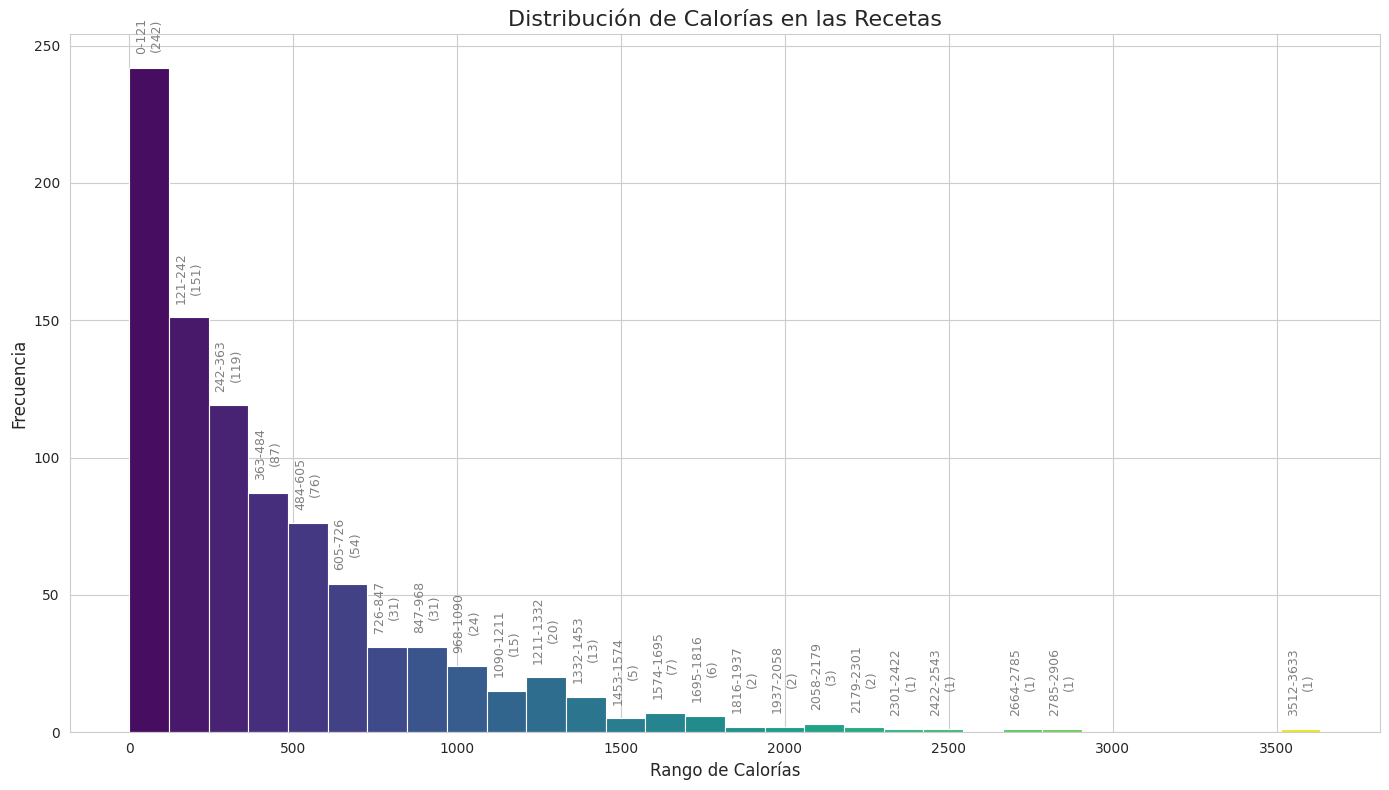

In [6]:

# Usar un estilo de Seaborn (opcional, pero ayuda a la estética general)
sns.set_style("whitegrid")

plt.figure(figsize=(14, 8)) # Aumenta ligeramente el tamaño

# Crea el histograma y captura la información de las barras
n, bins, patches = plt.hist(df_recipe['calories'],
                            bins=30,
                            edgecolor='white', # Bordes blancos para separar las barras
                            linewidth=0.8)

plt.title('Distribución de Calorías en las Recetas', fontsize=16)
plt.xlabel('Rango de Calorías', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Obtener una paleta de colores. Necesitamos al menos tantos colores como barras.
colores_paleta = sns.color_palette("viridis", n_colors=len(patches)) # Puedes cambiar "viridis" por otra paleta

# Asignar un color diferente a cada barra y añadir anotaciones
for i in range(len(patches)):
    patch = patches[i]
    height = patch.get_height()

    # Asignar color a la barra
    patch.set_facecolor(colores_paleta[i])

    if height > 0:
        bin_center = bins[i] + (bins[i+1] - bins[i]) / 2
        text_to_show = f"{int(bins[i])}-{int(bins[i+1])}\n({int(height)})"

        plt.text(bin_center,
                 height + 5,
                 text_to_show,
                 ha='center',
                 va='bottom',
                 fontsize=9,
                 rotation=90,
                 color='gray')

plt.tight_layout()
plt.show()

In [7]:
print('The median of calories is:', df_recipe['calories'].median())
print(df_recipe['calories'].mode())

df_recipe['calories'] = df_recipe['calories'].fillna(df_recipe['calories'].median())
print(df_recipe['calories'].isna().sum())

The median of calories is: 288.55
0     34.97
1     47.89
2    128.30
3    529.26
Name: calories, dtype: float64
0


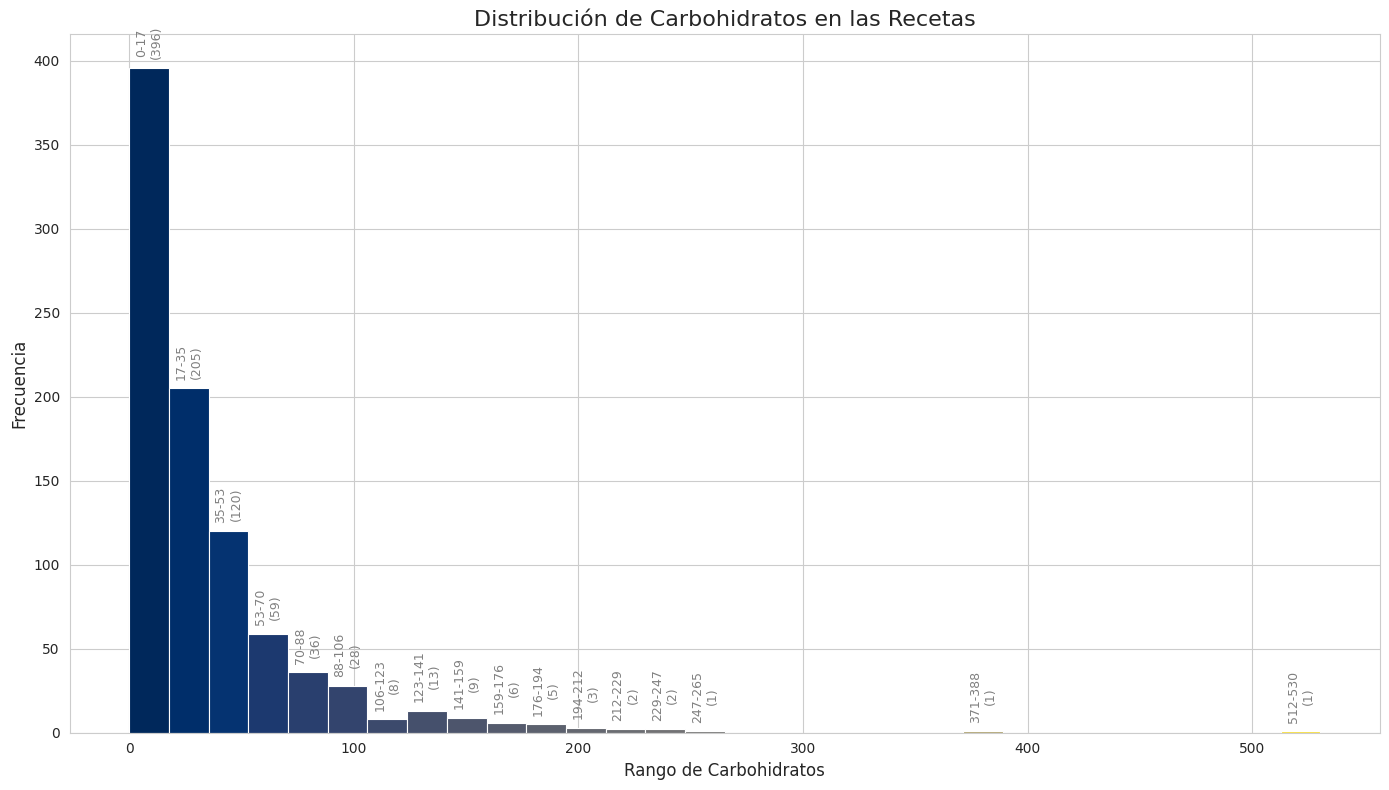

In [8]:

# Usar un estilo de Seaborn (opcional, pero ayuda a la estética general)
sns.set_style("whitegrid")

plt.figure(figsize=(14, 8))

# Crea el histograma y captura la información de las barras
n, bins, patches = plt.hist(df_recipe['carbohydrate'],
                            bins=30,
                            edgecolor='white',
                            linewidth=0.8)

plt.title('Distribución de Carbohidratos en las Recetas', fontsize=16)
plt.xlabel('Rango de Carbohidratos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Obtener una paleta de colores. Necesitamos al menos tantos colores como barras.
colores_paleta = sns.color_palette("cividis", n_colors=len(patches)) # Puedes cambiar "viridis" por otra paleta

# Asignar un color diferente a cada barra y añadir anotaciones
for i in range(len(patches)):
    patch = patches[i]
    height = patch.get_height()

    # Asignar color a la barra
    patch.set_facecolor(colores_paleta[i])

    if height > 0:
        bin_center = bins[i] + (bins[i+1] - bins[i]) / 2
        text_to_show = f"{int(bins[i])}-{int(bins[i+1])}\n({int(height)})"

        plt.text(bin_center,
                 height + 5,
                 text_to_show,
                 ha='center',
                 va='bottom',
                 fontsize=9,
                 rotation=90,
                 color='gray')

plt.tight_layout()
plt.show()

In [9]:
print('The median of carbohydrate is:', df_recipe['carbohydrate'].median())
print(df_recipe['carbohydrate'].mode())

df_recipe['carbohydrate'] = df_recipe['carbohydrate'].fillna(df_recipe['carbohydrate'].median())
print(df_recipe['carbohydrate'].isna().sum())

The median of carbohydrate is: 21.48
0    3.46
1    5.14
2    6.40
3    7.73
4    9.58
Name: carbohydrate, dtype: float64
0


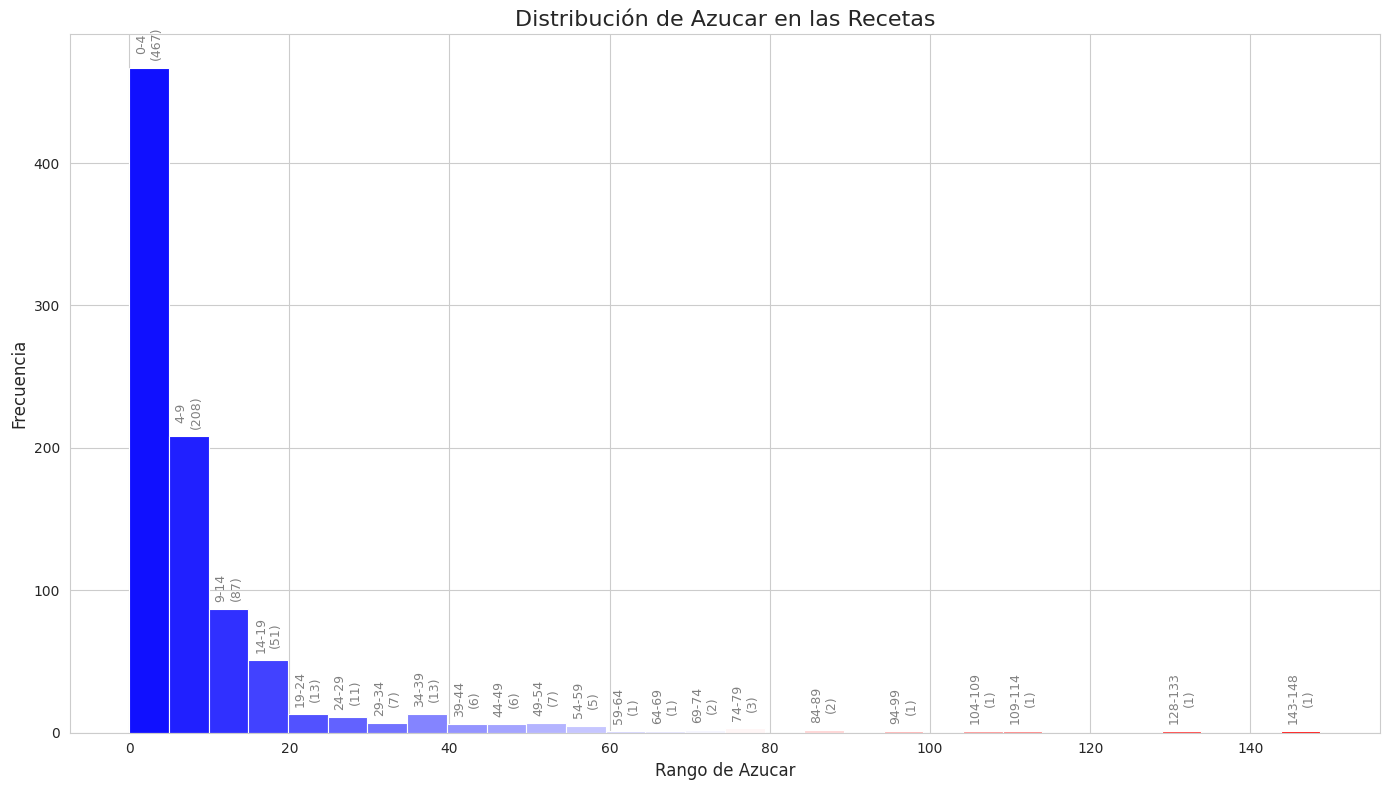

In [10]:

# Usar un estilo de Seaborn (opcional, pero ayuda a la estética general)
sns.set_style("whitegrid")

plt.figure(figsize=(14, 8)) # Aumenta ligeramente el tamaño

# Crea el histograma y captura la información de las barras
n, bins, patches = plt.hist(df_recipe['sugar'],
                            bins=30,
                            edgecolor='white', # Bordes blancos para separar las barras
                            linewidth=0.8)

plt.title('Distribución de Azucar en las Recetas', fontsize=16)
plt.xlabel('Rango de Azucar', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Obtener una paleta de colores. Necesitamos al menos tantos colores como barras.
colores_paleta = sns.color_palette("bwr", n_colors=len(patches)) # Puedes cambiar "viridis" por otra paleta

# Asignar un color diferente a cada barra y añadir anotaciones
for i in range(len(patches)):
    patch = patches[i]
    height = patch.get_height()

    # Asignar color a la barra
    patch.set_facecolor(colores_paleta[i])

    if height > 0:
        bin_center = bins[i] + (bins[i+1] - bins[i]) / 2
        text_to_show = f"{int(bins[i])}-{int(bins[i+1])}\n({int(height)})"

        plt.text(bin_center,
                 height + 5,
                 text_to_show,
                 ha='center',
                 va='bottom',
                 fontsize=9,
                 rotation=90,
                 color='gray')

plt.tight_layout()
plt.show()

In [11]:
print('The median of sugar is:', df_recipe['sugar'].median())
print(df_recipe['sugar'].mode())

df_recipe['sugar'] = df_recipe['sugar'].fillna(df_recipe['sugar'].median())
print(df_recipe['sugar'].isna().sum())

The median of sugar is: 4.55
0    1.51
1    1.62
Name: sugar, dtype: float64
0


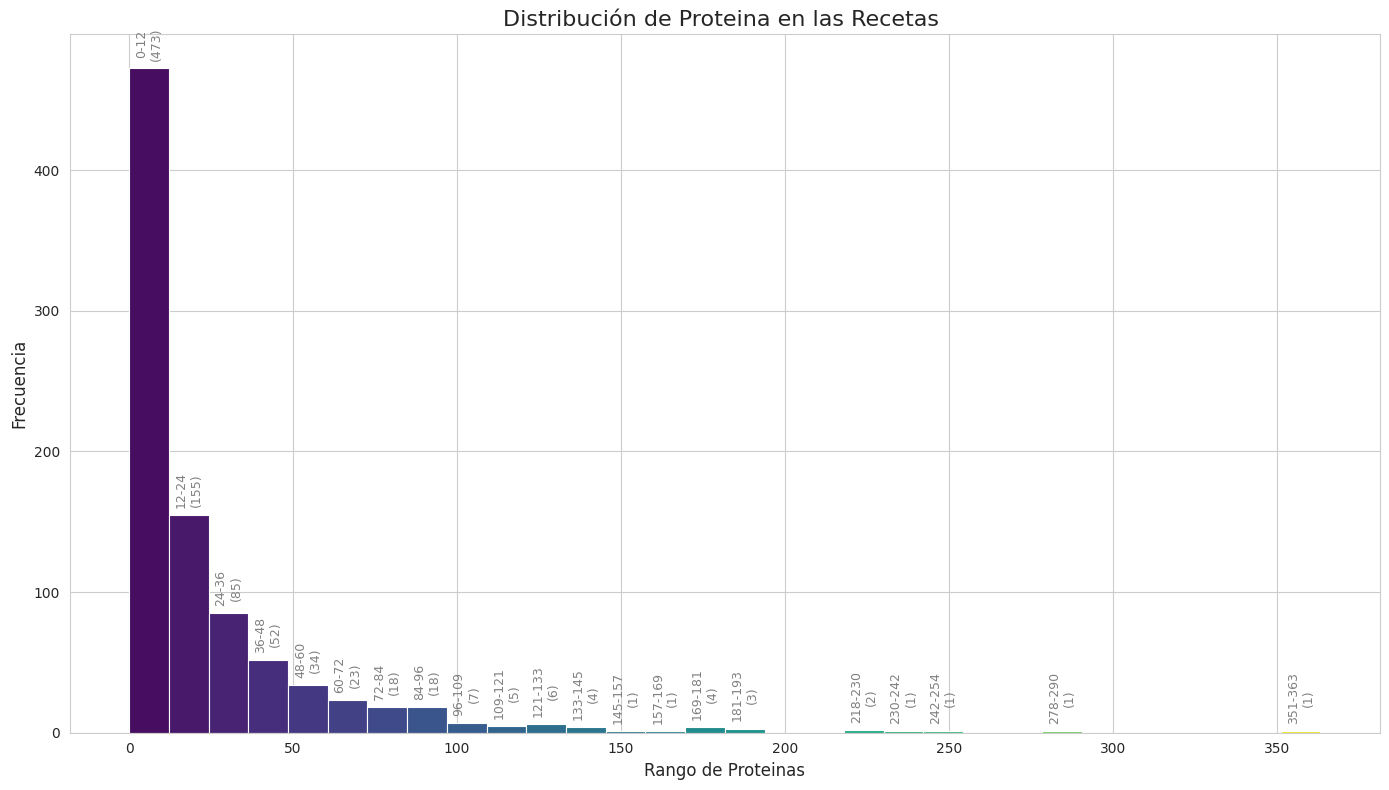

In [12]:

# Usar un estilo de Seaborn (opcional, pero ayuda a la estética general)
sns.set_style("whitegrid")

plt.figure(figsize=(14, 8)) # Aumenta ligeramente el tamaño

# Crea el histograma y captura la información de las barras
n, bins, patches = plt.hist(df_recipe['protein'],
                            bins=30,
                            edgecolor='white', # Bordes blancos para separar las barras
                            linewidth=0.8)

plt.title('Distribución de Proteina en las Recetas ', fontsize=16)
plt.xlabel('Rango de Proteinas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Obtener una paleta de colores. Necesitamos al menos tantos colores como barras.
colores_paleta = sns.color_palette("viridis", n_colors=len(patches)) # Puedes cambiar "viridis" por otra paleta

# Asignar un color diferente a cada barra y añadir anotaciones
for i in range(len(patches)):
    patch = patches[i]
    height = patch.get_height()

    # Asignar color a la barra
    patch.set_facecolor(colores_paleta[i])

    if height > 0:
        bin_center = bins[i] + (bins[i+1] - bins[i]) / 2
        text_to_show = f"{int(bins[i])}-{int(bins[i+1])}\n({int(height)})"

        plt.text(bin_center,
                 height + 5,
                 text_to_show,
                 ha='center',
                 va='bottom',
                 fontsize=9,
                 rotation=90,
                 color='gray')

plt.tight_layout()
plt.show()

In [13]:
print('The median of protein is:', df_recipe['protein'].median())
print(df_recipe['protein'].mode())

df_recipe['protein'] = df_recipe['protein'].fillna(df_recipe['protein'].median())
print(df_recipe['protein'].isna().sum())

The median of protein is: 10.8
0    0.36
Name: protein, dtype: float64
0


In [14]:
# Convertir `high_traffic` a formato binario: High = 1, else = 0
df_recipe['high_traffic'] = df_recipe['high_traffic'].apply(lambda x: 1 if x == 'High' else 0)
df_recipe['high_traffic'].value_counts()

,count
high_traffic,
1,574
0,373


In [15]:
# Asumiendo que df_recipe es tu DataFrame con la columna 'high_traffic'
# ya convertida a 1s y 0s

# Calcula la media de la columna 'high_traffic'
tasa_inicial_alto_trafico = df_recipe['high_traffic'].mean()

# Convierte a porcentaje para una interpretación más fácil
tasa_inicial_alto_trafico_porcentaje = tasa_inicial_alto_trafico * 100

print(f"Tasa Inicial de Alto Tráfico (Proporción): {tasa_inicial_alto_trafico:.4f}")
print(f"Tasa Inicial de Alto Tráfico (Porcentaje): {tasa_inicial_alto_trafico_porcentaje:.2f}%")

Tasa Inicial de Alto Tráfico (Proporción): 0.6061
Tasa Inicial de Alto Tráfico (Porcentaje): 60.61%


In [16]:
df_onehot = df_recipe

df_target = df_recipe

!pip install catboost

!pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.8 MB/s eta 0:00:00


In [17]:
# Convertir `servings` a numérico
df_recipe['servings'] = pd.to_numeric(df_recipe['servings'], errors='coerce')
df_recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      944 non-null    float64
 7   high_traffic  947 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 59.3+ KB


/tmp/ipython-input-3958935432.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_recipe, y='category', order=order, palette='viridis') # Usa y='category' y order por frecuencia


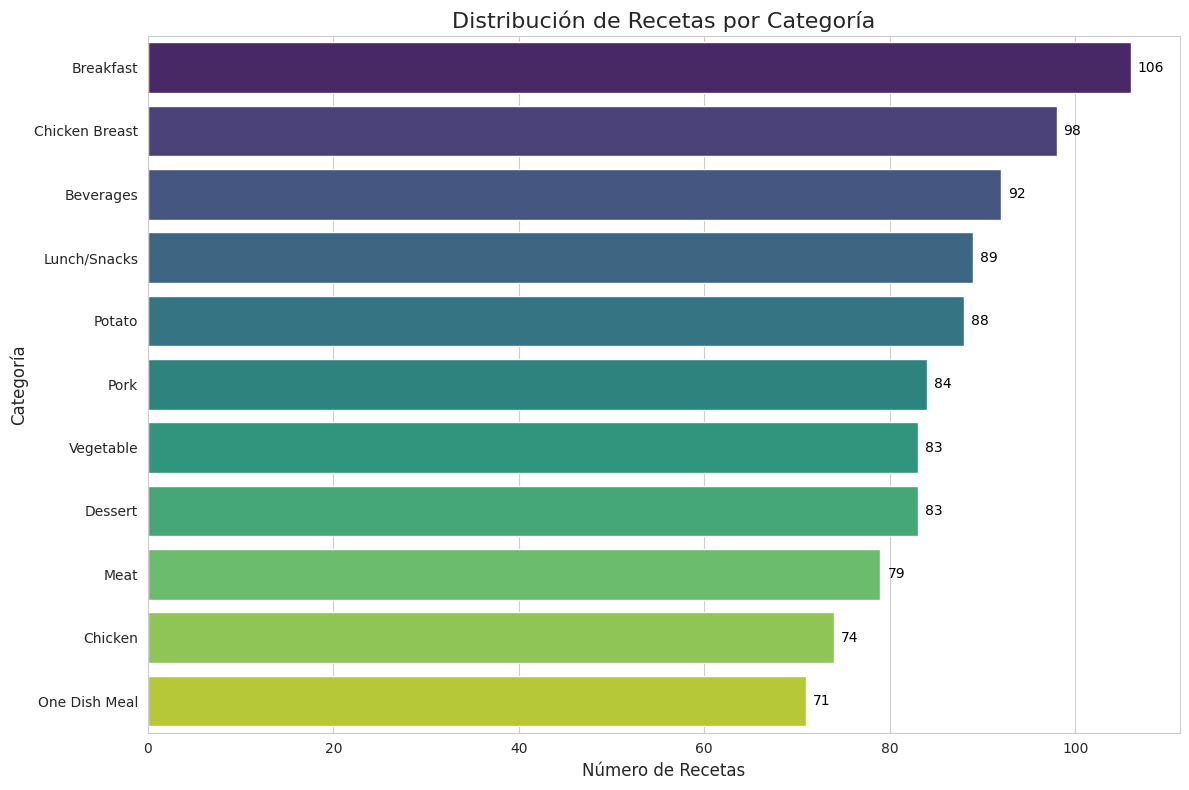

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya tienes tu DataFrame df_recipe cargado

# Usar un estilo de Seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8)) # Ajusta el tamaño para que las etiquetas de categoría se vean bien

# Crear el gráfico de barras de conteo para 'category'
# Usamos y='category' para barras horizontales
# Usamos order para ordenar las categorías por frecuencia (del más común al menos común)
order = df_recipe['category'].value_counts().index

ax = sns.countplot(data=df_recipe, y='category', order=order, palette='viridis') # Usa y='category' y order por frecuencia

plt.title('Distribución de Recetas por Categoría', fontsize=16)
plt.xlabel('Número de Recetas', fontsize=12)
plt.ylabel('Categoría', fontsize=12)

# Añadir etiquetas de conteo a cada barra
for p in ax.patches:
    # Obtener el ancho de la barra (para barras horizontales)
    width = p.get_width()
    # Obtener la posición y de la barra (para barras horizontales)
    y_position = p.get_y() + p.get_height() / 2

    # El texto a mostrar (solo el conteo)
    text_to_show = f'{int(width)}'

    # Anotar el texto
    ax.annotate(text_to_show, # El texto a anotar (el conteo)
                (width, y_position), # La posición del texto (al final de la barra, centrado verticalmente)
                ha='left', # Alineación horizontal (a la izquierda del punto)
                va='center', # Alineación vertical (centrado)
                xytext=(5, 0), # Desplazamiento del texto (5 puntos a la derecha)
                textcoords='offset points',
                fontsize=10,
                color='black')

plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se superpongan
plt.show()

/tmp/ipython-input-3660472273.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_recipe, x='servings', order=order, palette='viridis') # Puedes elegir otra paleta


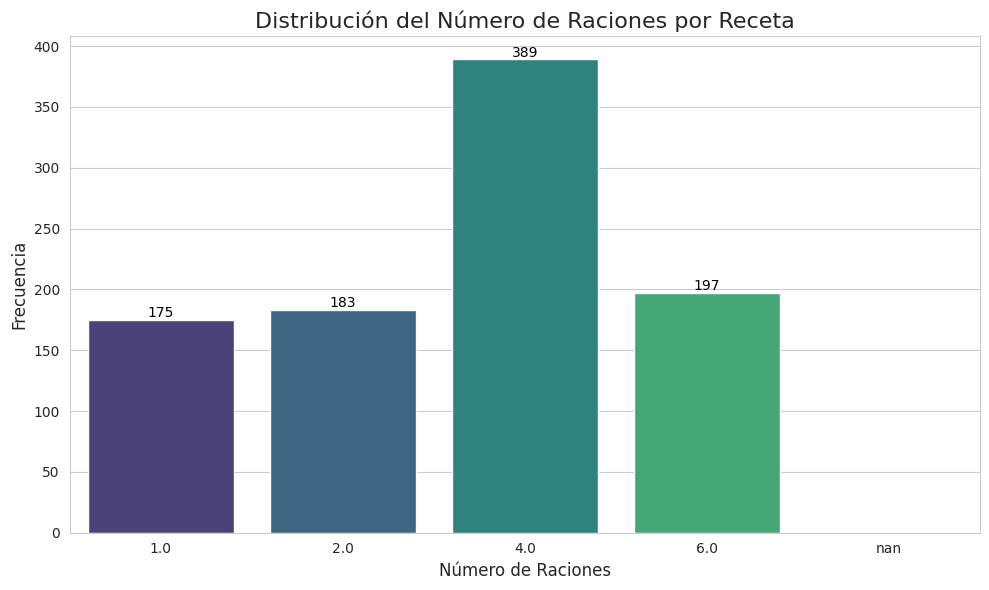

In [19]:

# Usar un estilo de Seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6)) # Ajusta el tamaño según necesites

# Crear el gráfico de barras de conteo
# Usamos order para asegurar que las barras aparezcan en un orden específico si lo deseas
# order = df_recipe['servings'].value_counts().index # Ordenar por frecuencia (mayor a menor)
# O si prefieres ordenar numéricamente (ej. 1, 2, 4, 6)
order = sorted(df_recipe['servings'].unique())


ax = sns.countplot(data=df_recipe, x='servings', order=order, palette='viridis') # Puedes elegir otra paleta

plt.title('Distribución del Número de Raciones por Receta', fontsize=16)
plt.xlabel('Número de Raciones', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Añadir etiquetas (valor y conteo) a cada barra
for p in ax.patches:
    # Obtener la altura de la barra
    height = p.get_height()
    # Obtener el valor del bin (el número de raciones)
    # Asegurarse de que sea un entero si la columna es float pero representa enteros
    servings_value = int(p.get_x() + p.get_width() / 2) if df_recipe['servings'].dtype == 'float64' else p.get_x() + p.get_width() / 2
    servings_value = order[int(p.get_x() + 0.5)] # Una forma más robusta de obtener el valor del bin si usas 'order'


    # El texto a mostrar (valor de raciones y conteo)
    text_to_show = f'{int(height)}' # Muestra solo el conteo

    # Si quieres mostrar el valor de las raciones y el conteo:
    # text_to_show = f'{int(p.get_x() + 0.5)}\n({int(height)})' # Obtiene el valor entero del bin

    ax.annotate(f'{int(height)}', # El texto a anotar (el conteo)
                (p.get_x() + p.get_width() / 2., height), # La posición del texto (centro de la barra, encima)
                ha='center', # Alineación horizontal
                va='center', # Alineación vertical
                xytext=(0, 5), # Desplazamiento del texto (5 puntos hacia arriba)
                textcoords='offset points',
                fontsize=10,
                color='black') # Color del texto

plt.tight_layout()
plt.show()

/tmp/ipython-input-3562922274.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcion_alto_trafico_por_categoria.values, y=proporcion_alto_trafico_por_categoria.index, palette='viridis')


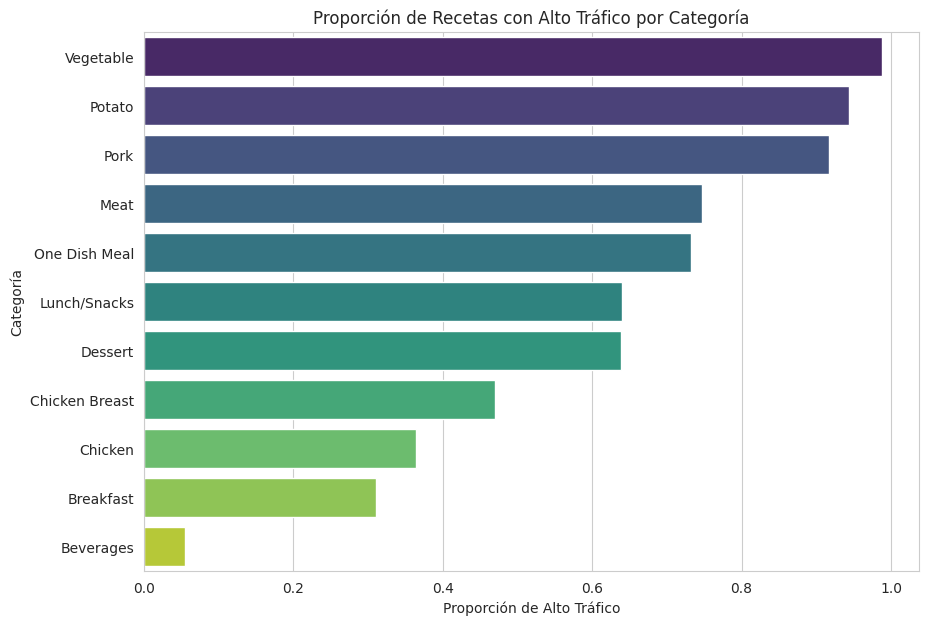

In [20]:
# Recalcular la proporción si es necesario
proporcion_alto_trafico_por_categoria = df_target.groupby('category')['high_traffic'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x=proporcion_alto_trafico_por_categoria.values, y=proporcion_alto_trafico_por_categoria.index, palette='viridis')
plt.title('Proporción de Recetas con Alto Tráfico por Categoría')
plt.xlabel('Proporción de Alto Tráfico')
plt.ylabel('Categoría')
plt.show()

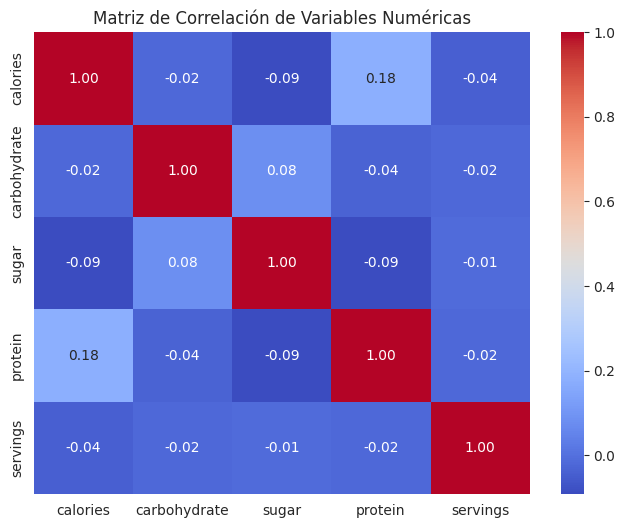

In [21]:
# 3. Matriz de Correlación (solo variables numéricas)
numerical_cols = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']
plt.figure(figsize=(8, 6))
sns.heatmap(df_recipe[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

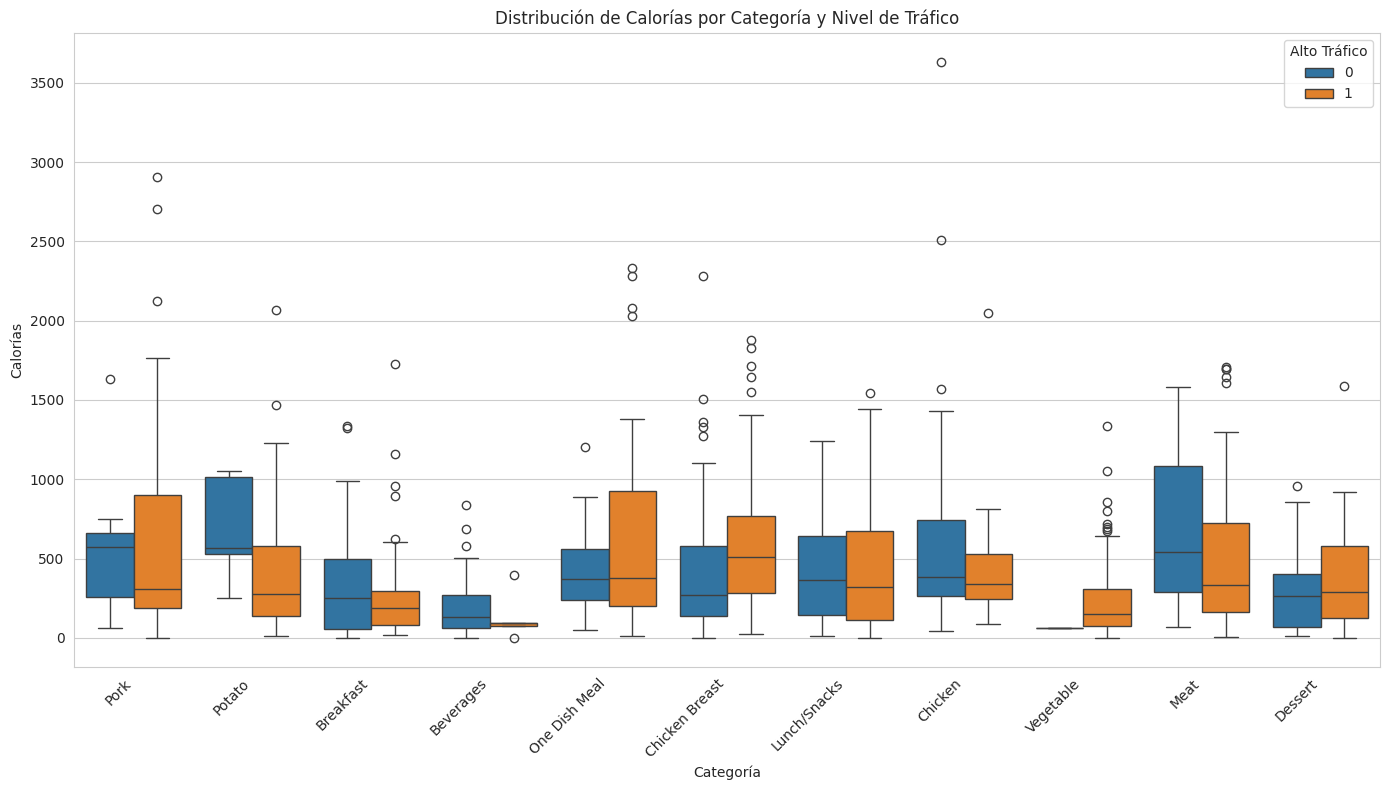

In [22]:
# 4. Ejemplo: Distribución de Calorías por Categoría y Nivel de Tráfico (Box Plot con Hue)
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_target, x='category', y='calories', hue='high_traffic')
plt.title('Distribución de Calorías por Categoría y Nivel de Tráfico')
plt.xlabel('Categoría')
plt.ylabel('Calorías')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x si son largas
plt.legend(title='Alto Tráfico')
plt.tight_layout()
plt.show()

In [23]:
print('The median of servings is:', df_recipe['servings'].median())
print('The mode of servings is:', df_recipe['servings'].mode())
print('The average of servings is:', df_recipe['servings'].mean().round(2))

# Completar los valores faltantes a servings con la moda
df_recipe['servings'] = df_recipe['servings'].fillna(df_recipe['servings'].mode()[0])

# Convertir servings a entero, ya que solo existe recetas con porciones enteras y no asi a medias
df_recipe['servings'] = df_recipe['servings'].astype(int)


The median of servings is: 4.0
The mode of servings is: 0    4.0
Name: servings, dtype: float64
The average of servings is: 3.47


In [24]:
df_recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    int64  
 7   high_traffic  947 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 59.3+ KB


In [25]:
conteo_alto_trafico_por_categoria = df_recipe.groupby('category')['high_traffic'].sum()
conteo_alto_trafico_por_categoria

,high_traffic
category,
Beverages,5
Breakfast,33
Chicken,27
Chicken Breast,46
Dessert,53
Lunch/Snacks,57
Meat,59
One Dish Meal,52
Pork,77


In [26]:
import pandas as pd

# Suponiendo que ya tienes tu DataFrame df_recipe cargado
# y que convertiste 'high_traffic' a 0s y 1s (donde 1 es alto tráfico)

# --- Calcular la proporción de recetas con alto tráfico por categoría ---
# Agrupar por 'category' y calcular la MEDIA de 'high_traffic' para cada grupo
# La media de 0s y 1s es la proporción de 1s
proporcion_alto_trafico_por_categoria = df_recipe.groupby('category')['high_traffic'].mean()

# --- Opcional: Convertir la proporción a porcentaje (%) ---
proporcion_alto_trafico_por_categoria_pct = proporcion_alto_trafico_por_categoria * 100

# --- Mostrar los resultados ---
print("Proporción (Media) de recetas con alto tráfico por categoría:")
# Puedes formatear la salida para mejor legibilidad si lo deseas
print(proporcion_alto_trafico_por_categoria.sort_values(ascending=False).round(3)) # Ordenar y redondear a 3 decimales

print("\nProporción (%) de recetas con alto tráfico por categoría:")
# Puedes formatear la salida para mejor legibilidad si lo deseas
print(proporcion_alto_trafico_por_categoria_pct.sort_values(ascending=False).round(2)) # Ordenar y redondear a 2 decimales

Proporción (Media) de recetas con alto tráfico por categoría:
category
Vegetable         0.988
Potato            0.943
Pork              0.917
Meat              0.747
One Dish Meal     0.732
Lunch/Snacks      0.640
Dessert           0.639
Chicken Breast    0.469
Chicken           0.365
Breakfast         0.311
Beverages         0.054
Name: high_traffic, dtype: float64

Proporción (%) de recetas con alto tráfico por categoría:
category
Vegetable         98.80
Potato            94.32
Pork              91.67
Meat              74.68
One Dish Meal     73.24
Lunch/Snacks      64.04
Dessert           63.86
Chicken Breast    46.94
Chicken           36.49
Breakfast         31.13
Beverages          5.43
Name: high_traffic, dtype: float64


In [27]:
df_recipe.head(10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,288.55,21.48,4.55,10.80,Pork,6,1
1,2,35.48,38.56,0.66,0.92,Potato,4,1
2,3,914.28,42.68,3.09,2.88,Breakfast,1,0
3,4,97.03,30.56,38.63,0.02,Beverages,4,1
4,5,27.05,1.85,0.80,0.53,Beverages,4,0
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,1
6,7,183.94,47.95,9.75,46.71,Chicken Breast,4,0
7,8,299.14,3.17,0.40,32.40,Lunch/Snacks,4,0
8,9,538.52,3.78,3.37,3.79,Pork,6,1
9,10,248.28,48.54,3.99,113.85,Chicken,2,0


In [28]:
df_recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    int64  
 7   high_traffic  947 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 59.3+ KB


In [29]:
# Modelo CatBoost
# Primero, asegúrate de tener la biblioteca catboost instalada
# Si no la tienes, ejecuta la siguiente línea en una celda de código separada:
# !pip install catboost

import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


# --- Implementación de CatBoost ---

# 1. Separar características (X) y variable objetivo (y)
X = df_recipe.drop('high_traffic', axis=1)
y = df_recipe['high_traffic']

# 2. Identificación de la columna categórica
# Pasaremos los nombres de las columnas categóricas
categorical_features_names = ['category']

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
# Estratificar es buena práctica si la variable objetivo está desbalanceada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Inicializar y entrenar el modelo CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    loss_function='Logloss',
    eval_metric='AUC',
    random_state=42,
    verbose=0, # Configura a un número (ej: 100) para ver el progreso
    cat_features=categorical_features_names # Especifica las columnas categóricas por nombre
)

print("Entrenando modelo CatBoost...")
model.fit(X_train, y_train)
print("Entrenamiento completado.")

# 5. Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilidad de la clase 1

# 6. Evaluar el modelo
print("\nEvaluación del modelo en el conjunto de prueba:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 7. Importancia de las características
print("\nImportancia de las características:")
feature_importances = model.get_feature_importance(prettified=True)
print(feature_importances)

Entrenando modelo CatBoost...
Entrenamiento completado.

Evaluación del modelo en el conjunto de prueba:
Accuracy: 0.7842
AUC: 0.8521

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        75
           1       0.85      0.78      0.81       115

    accuracy                           0.78       190
   macro avg       0.78      0.78      0.78       190
weighted avg       0.79      0.78      0.79       190


Importancia de las características:
     Feature Id  Importances
0      category    41.703505
1       protein    13.113526
2      calories    11.589400
3  carbohydrate     9.016901
4      servings     8.818876
5        recipe     8.625554
6         sugar     7.132238


In [30]:
# Modelo XGBoost

# !pip install pandas scikit-learn category_encoders xgboost

import pandas as pd
import numpy as np # Necesario para np.random.randint/uniform
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler # Para escalar las características si es necesario (XGBoost es menos sensible, pero buena práctica)
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import category_encoders as ce

# --- Preparación para Modelado ---

# 1. Separar características (X) y variable objetivo (y)
X = df_target.drop('high_traffic', axis=1)
y = df_target['high_traffic']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
# Crucial para aplicar Target Encoding y evaluar el modelo correctamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


pipeline = Pipeline([
    ('target_encoder', ce.TargetEncoder(cols=['category'], smoothing=1.0, min_samples_leaf=20)),
    ('scaler', StandardScaler()), # Escala todas las características numéricas resultantes
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)) # Configuración básica de XGBoost
])

# --- Ajuste de Hiperparámetros con Random Search y Validación Cruzada ---
# Aquí es donde optimizamos el modelo.

# 4. Definir la cuadrícula de parámetros para buscar
# Estamos buscando parámetros para los pasos 'target_encoder' y 'xgb' del pipeline.
# Los nombres de los parámetros en la cuadrícula deben ser 'nombre_del_paso__nombre_del_parametro'.
param_grid = {
    'target_encoder__smoothing': [1.0, 5.0, 10.0, 20.0], # Valores para el suavizado del Target Encoder
    'target_encoder__min_samples_leaf': [1, 5, 10, 20, 50], # Valores para min_samples_leaf
    'xgb__n_estimators': [100, 200, 300, 400, 500], # Número de árboles
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2], # Tasa de aprendizaje
    'xgb__max_depth': [3, 4, 5, 6, 7, 8], # Profundidad máxima de los árboles
    'xgb__subsample': [0.6, 0.7, 0.8, 0.9, 1.0], # Fracción de muestras para entrenar cada árbol
    'xgb__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], # Fracción de características para entrenar cada árbol
    'xgb__gamma': [0, 0.1, 0.2, 0.3, 0.4], # Regularización gamma
    'xgb__reg_alpha': [0, 0.1, 0.5, 1, 5], # Regularización L1
    'xgb__reg_lambda': [1, 1.5, 2, 3, 5] # Regularización L2
}

# 5. Configurar la validación cruzada estratificada
# Es importante usar validación cruzada estratificada para mantener la proporción de clases.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # 5 folds es común

# 6. Inicializar RandomizedSearchCV
# RandomizedSearchCV probará un número fijo de combinaciones de parámetros de forma aleatoria.
# n_iter: Número de combinaciones a probar. Cuanto mayor, más exhaustivo pero más lento.
# scoring: La métrica a optimizar. 'roc_auc' es buena para clasificación binaria desbalanceada.
# cv: El objeto de validación cruzada a usar.
# verbose: Controla la cantidad de información impresa.
# n_jobs: Número de núcleos de CPU a usar (-1 usa todos disponibles).
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=50, # Puedes aumentar este número (ej: 100, 200) para una búsqueda más profunda
    scoring='roc_auc', # O 'accuracy', 'f1', etc.
    cv=cv,
    verbose=2, # Ajusta según cuánta salida quieras ver
    random_state=42,
    n_jobs=-1 # Usar todos los núcleos disponibles
)

# 7. Ejecutar el ajuste de hiperparámetros en los datos de entrenamiento
print("Iniciando Random Search para optimizar XGBoost con Target Encoding...")
random_search.fit(X_train, y_train)
print("Random Search completado.")

# 8. Obtener el mejor modelo encontrado por Random Search
best_model = random_search.best_estimator_

print("\nMejores hiperparámetros encontrados:")
print(random_search.best_params_)

print(f"\nMejor puntuación de AUC (promedio CV) en el entrenamiento: {random_search.best_score_:.4f}")

# --- Evaluación del Mejor Modelo en el Conjunto de Prueba ---

# 9. Realizar predicciones con el mejor modelo en el conjunto de prueba
# El pipeline maneja automáticamente el preprocesamiento en X_test antes de la predicción.
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1] # Probabilidad de la clase 1

# 10. Evaluar el mejor modelo
print("\nEvaluación del Mejor Modelo en el conjunto de prueba:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Puedes opcionalmente imprimir la importancia de las características del modelo final (dentro del pipeline)
# print("\nImportancia de las características del mejor modelo:")
# print(best_model.named_steps['xgb'].feature_importances_)
# Nota: Interpretar la importancia después de Target Encoding puede ser un poco diferente.

Iniciando Random Search para optimizar XGBoost con Target Encoding...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Search completado.

Mejores hiperparámetros encontrados:
{'xgb__subsample': 1.0, 'xgb__reg_lambda': 1, 'xgb__reg_alpha': 0.1, 'xgb__n_estimators': 100, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.01, 'xgb__gamma': 0.4, 'xgb__colsample_bytree': 0.7, 'target_encoder__smoothing': 20.0, 'target_encoder__min_samples_leaf': 10}

Mejor puntuación de AUC (promedio CV) en el entrenamiento: 0.8176

Evaluación del Mejor Modelo en el conjunto de prueba:
Accuracy: 0.7737
AUC: 0.8545

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.53      0.65        75
           1       0.75      0.93      0.83       115

    accuracy                           0.77       190
   macro avg       0.79      0.73      0.74       190
weighted avg       0.79      0.77      0.76       190



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:38:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [31]:
df_target.head(10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,288.55,21.48,4.55,10.80,Pork,6,1
1,2,35.48,38.56,0.66,0.92,Potato,4,1
2,3,914.28,42.68,3.09,2.88,Breakfast,1,0
3,4,97.03,30.56,38.63,0.02,Beverages,4,1
4,5,27.05,1.85,0.80,0.53,Beverages,4,0
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,1
6,7,183.94,47.95,9.75,46.71,Chicken Breast,4,0
7,8,299.14,3.17,0.40,32.40,Lunch/Snacks,4,0
8,9,538.52,3.78,3.37,3.79,Pork,6,1
9,10,248.28,48.54,3.99,113.85,Chicken,2,0


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from category_encoders import TargetEncoder
from xgboost import XGBClassifier


# 2. Preparar datos
X = df_target.drop(['high_traffic', 'recipe'], axis=1)  # Eliminar target y columna ID
y = df_target['high_traffic']

# 3. Dividir datos (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4. Definir pipeline con los mejores hiperparámetros
best_params = {
    'target_encoder__smoothing': 20.0,
    'target_encoder__min_samples_leaf': 10,
    'xgb__subsample': 1.0,
    'xgb__reg_lambda': 1,
    'xgb__reg_alpha': 0.1,
    'xgb__n_estimators': 100,
    'xgb__max_depth': 3,
    'xgb__learning_rate': 0.01,
    'xgb__gamma': 0.4,
    'xgb__colsample_bytree': 0.7
}

pipeline = Pipeline([
    ('target_encoder', TargetEncoder(cols=['category'])),
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

# 5. Establecer los mejores parámetros en el pipeline
pipeline.set_params(**best_params)

# 6. Entrenar el modelo final con todos los datos de entrenamiento
print("Entrenando modelo XGBoost con los mejores hiperparámetros...")
pipeline.fit(X_train, y_train)
print("Entrenamiento completado.")

# 7. Evaluar en el conjunto de prueba
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

print("\n=== Resultados en Test ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 8. Opcional: Mostrar importancia de características
xgb_model = pipeline.named_steps['xgb']
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nImportancia de características:")
print(feature_importances)

# 9. Guardar el modelo entrenado para producción
import joblib
joblib.dump(pipeline, 'mejor_modelo_xgboost.pkl')
print("\nModelo guardado como 'mejor_modelo_xgboost.pkl'")

Entrenando modelo XGBoost con los mejores hiperparámetros...
Entrenamiento completado.

=== Resultados en Test ===
Accuracy: 0.7526
ROC-AUC: 0.8473

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.57      0.65        75
           1       0.76      0.87      0.81       115

    accuracy                           0.75       190
   macro avg       0.75      0.72      0.73       190
weighted avg       0.75      0.75      0.75       190


Importancia de características:
        feature  importance
4      category    0.678093
3       protein    0.111739
2         sugar    0.085534
1  carbohydrate    0.050585
0      calories    0.044529
5      servings    0.029520

Modelo guardado como 'mejor_modelo_xgboost.pkl'


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:38:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [33]:
# Asegúrate de tener estas bibliotecas instaladas:
# !pip install pandas scikit-learn category_encoders

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier # Importamos RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import category_encoders as ce

# --- Cargar y preparar los datos (Asegúrate de que esto coincida con tu notebook) ---
# Asumo que ya cargaste df_target desde CSV y hiciste el preprocesamiento básico (NaNs, high_traffic binario, servings a int)
# Si no, asegúrate de incluir ese código aquí.

# Ejemplo de carga y preprocesamiento básico (basado en tu notebook):
# from google.colab import drive
# drive.mount('/content/drive')
# df_target = pd.read_csv('/content/drive/MyDrive/Examen 2 - Professional - DataCamp/recipe_site_traffic_2212.csv')

# # Ejemplo de preprocesamiento (basado en tu notebook)
# df_recipe['calories'] = df_recipe['calories'].fillna(df_recipe['calories'].median())
# df_recipe['carbohydrate'] = df_recipe['carbohydrate'].fillna(df_recipe['carbohydrate'].median())
# df_recipe['sugar'] = df_recipe['sugar'].fillna(df_recipe['sugar'].median())
# df_recipe['protein'] = df_recipe['protein'].fillna(df_recipe['protein'].median())
# df_recipe['high_traffic'] = df_recipe['high_traffic'].apply(lambda x: 1 if x == 'High' else 0)
# df_recipe['servings'] = pd.to_numeric(df_recipe['servings'], errors='coerce')
# df_recipe['servings'] = df_recipe['servings'].fillna(df_recipe['servings'].mode()[0]).astype(int)
# # Asegúrate de que no queden otros NaN si los hay

# --- Preparación para Modelado ---

# 1. Separar características (X) y variable objetivo (y)
X = df_target.drop('high_traffic', axis=1)
y = df_target['high_traffic']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
# Crucial para aplicar Target Encoding y evaluar el modelo correctamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Construir un Pipeline para Target Encoding y RandomForest ---
# Un pipeline ayuda a encapsular los pasos de preprocesamiento y modelado
# y es esencial para un ajuste de hiperparámetros correcto.

# 3. Definir el pipeline
pipeline = Pipeline([
    ('target_encoder', ce.TargetEncoder(cols=['category'], smoothing=1.0, min_samples_leaf=20)),
    ('scaler', StandardScaler()), # Escala todas las características numéricas resultantes (opcional para RF, pero no hace daño)
    ('rf', RandomForestClassifier(random_state=42)) # Inicializamos RandomForestClassifier
])

# --- Ajuste de Hiperparámetros con Random Search y Validación Cruzada ---
# Aquí es donde optimizamos el modelo Random Forest.

# 4. Definir la cuadrícula de parámetros para buscar para Random Forest
param_grid = {
    'target_encoder__smoothing': [1.0, 5.0, 10.0, 20.0], # Valores para el suavizado del Target Encoder
    'target_encoder__min_samples_leaf': [1, 5, 10, 20, 50], # Valores para min_samples_leaf
    'rf__n_estimators': [100, 200, 300, 400, 500, 600], # Número de árboles en el bosque
    'rf__max_depth': [None, 5, 10, 15, 20], # Profundidad máxima del árbol (None significa sin límite)
    'rf__min_samples_split': [2, 5, 10, 20], # Número mínimo de muestras requeridas para dividir un nodo interno
    'rf__min_samples_leaf': [1, 2, 5, 10], # Número mínimo de muestras requeridas para ser un nodo hoja
    'rf__bootstrap': [True, False], # Si se usan bootstrap samples al construir árboles
    'rf__class_weight': [None, 'balanced', 'balanced_subsample'] # Ponderación de clases
}

# 5. Configurar la validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # 5 folds es común

# 6. Inicializar RandomizedSearchCV para Random Forest
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=50, # Puedes aumentar este número para una búsqueda más profunda
    scoring='roc_auc', # O la métrica que prefieras (ej: 'f1', 'accuracy')
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1 # Usar todos los núcleos disponibles
)

# 7. Ejecutar el ajuste de hiperparámetros en los datos de entrenamiento
print("Iniciando Random Search para optimizar Random Forest con Target Encoding...")
random_search.fit(X_train, y_train)
print("Random Search completado.")

# 8. Obtener el mejor modelo encontrado por Random Search
best_model_rf = random_search.best_estimator_

print("\nMejores hiperparámetros encontrados para Random Forest:")
print(random_search.best_params_)

print(f"\nMejor puntuación de AUC (promedio CV) en el entrenamiento para Random Forest: {random_search.best_score_:.4f}")

# --- Evaluación del Mejor Modelo Random Forest en el Conjunto de Prueba ---

# 9. Realizar predicciones con el mejor modelo en el conjunto de prueba
y_pred_rf = best_model_rf.predict(X_test)
y_pred_proba_rf = best_model_rf.predict_proba(X_test)[:, 1] # Probabilidad de la clase 1

# 10. Evaluar el mejor modelo
print("\nEvaluación del Mejor Modelo Random Forest en el conjunto de prueba:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

# Opcional: Importancia de las características (después de Target Encoding)
# print("\nImportancia de las características del mejor modelo Random Forest:")
# print(best_model_rf.named_steps['rf'].feature_importances_)

Iniciando Random Search para optimizar Random Forest con Target Encoding...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Search completado.

Mejores hiperparámetros encontrados para Random Forest:
{'target_encoder__smoothing': 10.0, 'target_encoder__min_samples_leaf': 1, 'rf__n_estimators': 100, 'rf__min_samples_split': 20, 'rf__min_samples_leaf': 2, 'rf__max_depth': 5, 'rf__class_weight': 'balanced_subsample', 'rf__bootstrap': True}

Mejor puntuación de AUC (promedio CV) en el entrenamiento para Random Forest: 0.8137

Evaluación del Mejor Modelo Random Forest en el conjunto de prueba:
Accuracy: 0.7632
AUC: 0.8521

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.66      0.83      0.73        75
           1       0.86      0.72      0.79       115

    accuracy                           0.76       190
   macro avg       0.76      0.77      0.76       190
weighted avg       0.78      0.76      0.77       190



In [34]:
# Asegúrate de tener estas bibliotecas instaladas:
# !pip install pandas scikit-learn category_encoders lightgbm

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import lightgbm as lgb # Importamos LightGBM
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import category_encoders as ce

# --- ASUMIENDO que df_target ya está cargado y completamente limpio ---
# df_target = ... # Tu DataFrame limpio debe estar definido aquí

print("DataFrame df_target listo para modelado.")
print(df_target.info())
print("\nValores nulos en df_target:")
print(df_target.isnull().sum())
# --- Fin de la asunción ---


# --- 1. Preparación para Modelado ---

# Separar características (X) y variable objetivo (y)
# Asegúrate de que 'high_traffic' es tu columna objetivo
X = df_target.drop('high_traffic', axis=1)
y = df_target['high_traffic']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
# Crucial para un Target Encoding correcto y evaluación no sesgada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")
print(f"Proporción de la clase 'Alto Tráfico' en entrenamiento: {y_train.mean():.4f}")
print(f"Proporción de la clase 'Alto Tráfico' en prueba: {y_test.mean():.4f}")


# --- 3. Construir un Pipeline para Target Encoding y LightGBM ---
# Un pipeline asegura que el preprocesamiento (Target Encoding, Escalado)
# se aplique consistentemente tanto al entrenamiento como a la predicción.

pipeline = Pipeline([
    # Paso 1: Target Encoding para la columna 'category'
    # Especificamos la columna categórica aquí
    ('target_encoder', ce.TargetEncoder(cols=['category'], smoothing=1.0, min_samples_leaf=20)),

    # Paso 2: Escalado de Características
    # StandardScaler escala todas las características numéricas resultantes
    ('scaler', StandardScaler()),

    # Paso 3: El Modelo LightGBM
    ('lgbm', lgb.LGBMClassifier(random_state=42)) # Configuración básica de LightGBM
])

print("\nPipeline definido: Target Encoding -> StandardScaler -> LGBMClassifier")

# --- 4. Ajuste de Hiperparámetros con Random Search y Validación Cruzada ---
# Esto es la parte de optimización.

# Definir la cuadrícula de parámetros para buscar para los pasos del pipeline
param_grid = {
    # Hiperparámetros para TargetEncoder
    'target_encoder__smoothing': [1.0, 5.0, 10.0, 20.0],
    'target_encoder__min_samples_leaf': [1, 5, 10, 20, 50],

    # Hiperparámetros para LGBMClassifier
    'lgbm__n_estimators': [100, 200, 300, 400, 500, 600],
    'lgbm__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'lgbm__num_leaves': [20, 31, 50, 70, 100],
    'lgbm__max_depth': [-1, 5, 8, 10, 12],
    'lgbm__min_child_samples': [10, 20, 30, 50, 80],
    'lgbm__subsample': [0.7, 0.8, 0.9, 1.0],
    'lgbm__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'lgbm__reg_alpha': [0, 0.1, 0.5, 1, 5],
    'lgbm__reg_lambda': [0, 0.1, 0.5, 1, 5],
    'lgbm__class_weight': [None, 'balanced'] # Opcional, para manejar desbalance de clases
}

# Configurar la validación cruzada estratificada (para mantener la proporción de clases)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar RandomizedSearchCV
# n_iter: Número de combinaciones a probar (aumenta para más exhaustividad)
# scoring: Métrica para evaluar y seleccionar el mejor modelo ('roc_auc' es buena para binaria)
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=50, # Puedes aumentar este número (ej: 100, 200) para una búsqueda más profunda
    scoring='roc_auc',
    cv=cv,
    verbose=2, # Ajusta para ver el progreso (ej: 0, 1, 2)
    random_state=42,
    n_jobs=-1 # Usar todos los núcleos disponibles
)

# Ejecutar el ajuste de hiperparámetros en los datos de entrenamiento
print("\nIniciando Random Search para optimizar el Pipeline (Target Encoding + LightGBM)...")
random_search.fit(X_train, y_train)
print("Random Search completado.")

# --- 5. Obtener y Evaluar el Mejor Modelo ---

# Obtener el mejor pipeline encontrado por Random Search
best_model = random_search.best_estimator_

print("\n--- Resultados de la Optimización ---")
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

print(f"\nMejor puntuación de AUC (promedio CV) en el entrenamiento: {random_search.best_score_:.4f}")

# Evaluar el mejor modelo en el conjunto de prueba (evaluación final no sesgada)
print("\n--- Evaluación del Mejor Modelo en el Conjunto de Prueba ---")

# Realizar predicciones
y_pred_test = best_model.predict(X_test)
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1] # Probabilidades de la clase 1

# Reportar métricas de evaluación
print(f"Accuracy en conjunto de prueba: {accuracy_score(y_test, y_pred_test):.4f}")
print(f"AUC en conjunto de prueba: {roc_auc_score(y_test, y_pred_proba_test):.4f}")

print("\nReporte de Clasificación en conjunto de prueba:")
print(classification_report(y_test, y_pred_test))

# --- Análisis Adicional (Opcional, para abordar el requisito del 80%) ---
# Puedes analizar el Recall y Precision para la clase 'Alto Tráfico' (clase 1)
report = classification_report(y_test, y_pred_test, output_dict=True)
recall_alto_trafico = report['1']['recall']
precision_alto_trafico = report['1']['precision']

print(f"\nRecall para la clase 'Alto Tráfico' (1): {recall_alto_trafico:.4f}")
print(f"Precision para la clase 'Alto Tráfico' (1): {precision_alto_trafico:.4f}")

# Puedes ajustar el umbral de probabilidad si necesitas priorizar Recall o Precision.
# Ejemplo: Umbral para intentar alcanzar un Recall alto (ej. 0.3 en lugar de 0.5 por defecto)
# y_pred_test_adjusted_threshold = (y_pred_proba_test > 0.3).astype(int)
# print("\nReporte de Clasificación con umbral ajustado (Ejemplo con umbral 0.3):")
# print(classification_report(y_test, y_pred_test_adjusted_threshold))

print("\nProceso de modelado y optimización completado.")

DataFrame df_target listo para modelado.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    int64  
 7   high_traffic  947 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 59.3+ KB
None

Valores nulos en df_target:
recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

Tamaño del conjunto de entrenamiento: (757, 7)
Tamaño del conjunto de prueba: (190, 7)
Proporción de la clase 'Alto Tráfico' en entrenamiento: 0.6063
Proporción de la cla

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [35]:
# Random forest con One Hot
# Asegúrate de tener estas bibliotecas instaladas:
# !pip install pandas scikit-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Importamos OneHotEncoder
from sklearn.compose import ColumnTransformer # Importamos ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier # Modelo: Random Forest
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# --- ASUMIENDO que df_onehot ya está cargado y completamente limpio ---
# df_onehot = ... # Tu DataFrame limpio debe estar definido aquí
# Asegúrate de que 'category' es tipo object y 'high_traffic' es binario (0 o 1)

print("DataFrame df_onehot listo para modelado con One-Hot Encoding (Random Forest).")
print(df_onehot.info())
print("\nValores nulos en df_onehot:")
print(df_onehot.isnull().sum())
# --- Fin de la asunción ---


# --- 1. Preparación para Modelado ---

# Separar características (X) y variable objetivo (y)
X = df_onehot.drop('high_traffic', axis=1)
y = df_onehot['high_traffic']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
# Crucial para aplicar transformaciones correctamente y evaluar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")
print(f"Proporción de la clase 'Alto Tráfico' en entrenamiento: {y_train.mean():.4f}")
print(f"Proporción de la clase 'Alto Tráfico' en prueba: {y_test.mean():.4f}")


# --- 3. Definir el Preprocesamiento con ColumnTransformer ---
# Aplicaremos One-Hot Encoding a 'category' y escalaremos las características numéricas.

# Identificar tipos de columnas
categorical_features = ['category']
# Seleccionar todas las columnas numéricas (excluye la columna objetivo que ya separamos)
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()


# Crear el ColumnTransformer
# Este transformador aplicará diferentes pasos a diferentes columnas
preprocessor = ColumnTransformer(
    transformers=[
        # Aplicar One-Hot Encoding a las columnas categóricas
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features), # drop='first' evita multicolinealidad
        # Aplicar escalado a las columnas numéricas
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough' # Dejar cualquier otra columna sin especificar (en este caso, no debería haber)
)

print("\nPreprocesador definido con One-Hot Encoding para 'category' y StandardScaler para numéricas.")

# --- 4. Construir el Pipeline (Preprocesamiento + Modelo Random Forest) ---
# El pipeline aplica primero el preprocesamiento y luego entrena el modelo.

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42)) # Nuestro modelo
                             ])

print(f"\nPipeline definido: Preprocesador -> {type(pipeline_rf.named_steps['classifier']).__name__}")


# --- 5. Ajuste de Hiperparámetros con Random Search y Validación Cruzada ---

# Definir la cuadrícula de parámetros para buscar para el Random Forest
# Los nombres de los parámetros deben empezar con 'classifier__' (el nombre del paso del modelo en el pipeline)
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300, 400, 500, 600], # Número de árboles en el bosque
    'classifier__max_depth': [None, 5, 10, 15, 20], # Profundidad máxima (None significa sin límite)
    'classifier__min_samples_split': [2, 5, 10, 20], # Min muestras para dividir un nodo
    'classifier__min_samples_leaf': [1, 2, 5, 10], # Min muestras para ser una hoja
    'classifier__bootstrap': [True, False], # Usar muestras bootstrap
    'classifier__class_weight': [None, 'balanced', 'balanced_subsample'] # Ponderación de clases
}

# Configurar la validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar RandomizedSearchCV
# n_iter: Número de combinaciones a probar (ajusta según el tiempo disponible)
random_search_rf = RandomizedSearchCV(
    pipeline_rf, # Usamos el pipeline de Random Forest
    param_distributions=param_grid_rf,
    n_iter=50, # Prueba 50 combinaciones aleatorias (aumenta para más exhaustividad)
    scoring='roc_auc', # O tu métrica principal (ej: 'f1', 'recall')
    cv=cv,
    verbose=2, # Muestra el progreso
    random_state=42,
    n_jobs=-1 # Usa todos los núcleos disponibles
)

# Ejecutar el ajuste de hiperparámetros en los datos de entrenamiento
print("\nIniciando Random Search para optimizar Random Forest con One-Hot Encoding...")
random_search_rf.fit(X_train, y_train)
print("Random Search completado.")

# --- 6. Obtener y Evaluar el Mejor Modelo ---

# Obtener el mejor pipeline encontrado por Random Search
best_pipeline_rf = random_search_rf.best_estimator_

print("\n--- Resultados de la Optimización (Random Forest) ---")
print("Mejores hiperparámetros encontrados:")
print(random_search_rf.best_params_)

print(f"\nMejor puntuación de AUC (promedio CV) en el entrenamiento: {random_search_rf.best_score_:.4f}")

# Evaluar el mejor pipeline en el conjunto de prueba
print("\n--- Evaluación del Mejor Pipeline (Random Forest) en el Conjunto de Prueba ---")

y_pred_test_rf = best_pipeline_rf.predict(X_test)
y_pred_proba_test_rf = best_pipeline_rf.predict_proba(X_test)[:, 1]

print(f"Accuracy en conjunto de prueba: {accuracy_score(y_test, y_pred_test_rf):.4f}")
print(f"AUC en conjunto de prueba: {roc_auc_score(y_test, y_pred_proba_test_rf):.4f}")
print("\nReporte de Clasificación en conjunto de prueba:")
print(classification_report(y_test, y_pred_test_rf))

# --- Análisis Adicional (Opcional) ---
report_rf = classification_report(y_test, y_pred_test_rf, output_dict=True)
recall_alto_trafico_rf = report_rf['1']['recall']
precision_alto_trafico_rf = report_rf['1']['precision']
print(f"\nRecall para la clase 'Alto Tráfico' (1) - RF: {recall_alto_trafico_rf:.4f}")
print(f"Precision para la clase 'Alto Tráfico' (1) - RF: {precision_alto_trafico_rf:.4f}")

DataFrame df_onehot listo para modelado con One-Hot Encoding (Random Forest).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    int64  
 7   high_traffic  947 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 59.3+ KB
None

Valores nulos en df_onehot:
recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

Tamaño del conjunto de entrenamiento: (757, 7)
Tamaño del conjunto de prueba: (190, 7)
Proporción de la clase 'Alto Tráfico' en entre

In [36]:
# xgboost con con One Hot

# Asegúrate de tener estas bibliotecas instaladas:
# !pip install pandas scikit-learn xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier # Modelo: XGBoost
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# --- ASUMIENDO que df_onehot ya está cargado y completamente limpio ---
# df_onehot = ... # Tu DataFrame limpio debe estar definido aquí
# Asegúrate de que 'category' es tipo object y 'high_traffic' es binario (0 o 1)
print("DataFrame df_onehot listo para modelado con One-Hot Encoding (XGBoost).")
# --- Fin de la asunción ---


# --- 1. Preparación para Modelado ---

# Separar características (X) y variable objetivo (y)
X = df_onehot.drop('high_traffic', axis=1)
y = df_onehot['high_traffic']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# --- 3. Definir el Preprocesamiento con ColumnTransformer ---
categorical_features = ['category']
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

print("\nPreprocesador definido con One-Hot Encoding para 'category' y StandardScaler para numéricas.")

# --- 4. Construir el Pipeline (Preprocesamiento + Modelo XGBoost) ---
# **NOTA: El nombre del paso del modelo es 'classifier' para consistencia con la cuadrícula**
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
                            ])

print(f"\nPipeline definido: Preprocesador -> {type(pipeline_xgb.named_steps['classifier']).__name__}")


# --- 5. Ajuste de Hiperparámetros con Random Search y Validación Cruzada ---

# Definir la cuadrícula de parámetros para buscar para el XGBoost
param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5, 6, 7, 8],
    'classifier__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'classifier__reg_alpha': [0, 0.1, 0.5, 1, 5],
    'classifier__reg_lambda': [1, 1.5, 2, 3, 5],
    'classifier__class_weight': [None, 'balanced'] # Puedes ponderar clases en XGBoost
}

# Configurar la validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    pipeline_xgb, # Usamos el pipeline de XGBoost
    param_distributions=param_grid_xgb,
    n_iter=50, # Prueba 50 combinaciones aleatorias (aumenta para más exhaustividad)
    scoring='roc_auc', # O tu métrica principal
    cv=cv,
    verbose=2, # Muestra el progreso
    random_state=42,
    n_jobs=-1 # Usa todos los núcleos disponibles
)

# Ejecutar el ajuste de hiperparámetros en los datos de entrenamiento
print("\nIniciando Random Search para optimizar XGBoost con One-Hot Encoding...")
random_search_xgb.fit(X_train, y_train)
print("Random Search completado.")

# --- 6. Obtener y Evaluar el Mejor Modelo ---

# Obtener el mejor pipeline encontrado por Random Search
best_pipeline_xgb = random_search_xgb.best_estimator_

print("\n--- Resultados de la Optimización (XGBoost) ---")
print("Mejores hiperparámetros encontrados:")
print(random_search_xgb.best_params_)

print(f"\nMejor puntuación de AUC (promedio CV) en el entrenamiento: {random_search_xgb.best_score_:.4f}")

# Evaluar el mejor pipeline en el conjunto de prueba
print("\n--- Evaluación del Mejor Pipeline (XGBoost) en el Conjunto de Prueba ---")

y_pred_test_xgb = best_pipeline_xgb.predict(X_test)
y_pred_proba_test_xgb = best_pipeline_xgb.predict_proba(X_test)[:, 1]

print(f"Accuracy en conjunto de prueba: {accuracy_score(y_test, y_pred_test_xgb):.4f}")
print(f"AUC en conjunto de prueba: {roc_auc_score(y_test, y_pred_proba_test_xgb):.4f}")
print("\nReporte de Clasificación en conjunto de prueba:")
print(classification_report(y_test, y_pred_test_xgb))

# --- Análisis Adicional (Opcional) ---
report_xgb = classification_report(y_test, y_pred_test_xgb, output_dict=True)
recall_alto_trafico_xgb = report_xgb['1']['recall']
precision_alto_trafico_xgb = report_xgb['1']['precision']
print(f"\nRecall para la clase 'Alto Tráfico' (1) - XGBoost: {recall_alto_trafico_xgb:.4f}")
print(f"Precision para la clase 'Alto Tráfico' (1) - XGBoost: {precision_alto_trafico_xgb:.4f}")

DataFrame df_onehot listo para modelado con One-Hot Encoding (XGBoost).

Preprocesador definido con One-Hot Encoding para 'category' y StandardScaler para numéricas.

Pipeline definido: Preprocesador -> XGBClassifier

Iniciando Random Search para optimizar XGBoost con One-Hot Encoding...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Search completado.

--- Resultados de la Optimización (XGBoost) ---
Mejores hiperparámetros encontrados:
{'classifier__subsample': 1.0, 'classifier__reg_lambda': 2, 'classifier__reg_alpha': 1, 'classifier__n_estimators': 200, 'classifier__max_depth': 4, 'classifier__learning_rate': 0.01, 'classifier__gamma': 0.2, 'classifier__colsample_bytree': 0.8, 'classifier__class_weight': 'balanced'}

Mejor puntuación de AUC (promedio CV) en el entrenamiento: 0.8055

--- Evaluación del Mejor Pipeline (XGBoost) en el Conjunto de Prueba ---
Accuracy en conjunto de prueba: 0.7684
AUC en conjunto de prueba: 0.8534

Reporte de Clasificación en conjunt

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:45:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [37]:
# LightGBM con One-Hot Encoding (Optimizado)

# Asegúrate de tener estas bibliotecas instaladas:
# !pip install pandas scikit-learn lightgbm

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import lightgbm as lgb # Modelo: LightGBM
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# --- ASUMIENDO que df_onehot ya está cargado y completamente limpio ---
# df_onehot = ... # Tu DataFrame limpio debe estar definido aquí
# Asegúrate de que 'category' es tipo object y 'high_traffic' es binario (0 o 1)
print("DataFrame df_onehot listo para modelado con One-Hot Encoding (LightGBM).")
# --- Fin de la asunción ---


# --- 1. Preparación para Modelado ---

# Separar características (X) y variable objetivo (y)
X = df_onehot.drop('high_traffic', axis=1)
y = df_onehot['high_traffic']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# --- 3. Definir el Preprocesamiento con ColumnTransformer ---
categorical_features = ['category']
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

print("\nPreprocesador definido con One-Hot Encoding para 'category' y StandardScaler para numéricas.")

# --- 4. Construir el Pipeline (Preprocesamiento + Modelo LightGBM) ---
# **NOTA: El nombre del paso del modelo es 'classifier' para consistencia con la cuadrícula**
pipeline_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', lgb.LGBMClassifier(random_state=42))
                             ])

print(f"\nPipeline definido: Preprocesador -> {type(pipeline_lgbm.named_steps['classifier']).__name__}")


# --- 5. Ajuste de Hiperparámetros con Random Search y Validación Cruzada ---

# Definir la cuadrícula de parámetros para buscar para el LightGBM
param_grid_lgbm = {
    'classifier__n_estimators': [100, 200, 300, 400, 500, 600],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__num_leaves': [20, 31, 50, 70, 100],
    'classifier__max_depth': [-1, 5, 8, 10, 12],
    'classifier__min_child_samples': [10, 20, 30, 50],
    'classifier__subsample': [0.7, 0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'classifier__reg_alpha': [0, 0.1, 0.5, 1, 5],
    'classifier__reg_lambda': [0, 0.1, 0.5, 1, 5],
    'classifier__class_weight': [None, 'balanced']
}

# Configurar la validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(
    pipeline_lgbm, # Usamos el pipeline de LightGBM
    param_distributions=param_grid_lgbm,
    n_iter=50, # Prueba 50 combinaciones aleatorias (aumenta para más exhaustividad)
    scoring='roc_auc', # O tu métrica principal
    cv=cv,
    verbose=2, # Muestra el progreso
    random_state=42,
    n_jobs=-1 # Usa todos los núcleos disponibles
)

# Ejecutar el ajuste de hiperparámetros en los datos de entrenamiento
print("\nIniciando Random Search para optimizar LightGBM con One-Hot Encoding...")
random_search_lgbm.fit(X_train, y_train)
print("Random Search completado.")

# --- 6. Obtener y Evaluar el Mejor Modelo ---

# Obtener el mejor pipeline encontrado por Random Search
best_pipeline_lgbm = random_search_lgbm.best_estimator_

print("\n--- Resultados de la Optimización (LightGBM) ---")
print("Mejores hiperparámetros encontrados:")
print(random_search_lgbm.best_params_)

print(f"\nMejor puntuación de AUC (promedio CV) en el entrenamiento: {random_search_lgbm.best_score_:.4f}")

# Evaluar el mejor pipeline en el conjunto de prueba
print("\n--- Evaluación del Mejor Pipeline (LightGBM) en el Conjunto de Prueba ---")

y_pred_test_lgbm = best_pipeline_lgbm.predict(X_test)
y_pred_proba_test_lgbm = best_pipeline_lgbm.predict_proba(X_test)[:, 1]

print(f"Accuracy en conjunto de prueba: {accuracy_score(y_test, y_pred_test_lgbm):.4f}")
print(f"AUC en conjunto de prueba: {roc_auc_score(y_test, y_pred_proba_test_lgbm):.4f}")
print("\nReporte de Clasificación en conjunto de prueba:")
print(classification_report(y_test, y_pred_test_lgbm))

# --- Análisis Adicional (Opcional) ---
report_lgbm = classification_report(y_test, y_pred_test_lgbm, output_dict=True)
recall_alto_trafico_lgbm = report_lgbm['1']['recall']
precision_alto_trafico_lgbm = report_lgbm['1']['precision']
print(f"\nRecall para la clase 'Alto Tráfico' (1) - LightGBM: {recall_alto_trafico_lgbm:.4f}")
print(f"Precision para la clase 'Alto Tráfico' (1) - LightGBM: {precision_alto_trafico_lgbm:.4f}")

DataFrame df_onehot listo para modelado con One-Hot Encoding (LightGBM).

Preprocesador definido con One-Hot Encoding para 'category' y StandardScaler para numéricas.

Pipeline definido: Preprocesador -> LGBMClassifier

Iniciando Random Search para optimizar LightGBM con One-Hot Encoding...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 459, number of negative: 298
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1290
[LightGBM] [Info] Number of data points in the train set: 757, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.606341 -> initscore=0.431957
[LightGBM] [Info] Start training from score 0.431957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [38]:
!pip install optuna

import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import optuna

# 1. Cargar y preparar los datos
# Asumo que df_recipe tiene la misma estructura que mencionaste anteriormente
X = df_recipe.drop(['high_traffic', 'recipe'], axis=1)  # Eliminar target y columna ID
y = df_recipe['high_traffic']

# Identificar columnas categóricas (ajusta según tu dataset)
cat_features = ['category']  # CatBoost manejará estas automáticamente

# 2. División estratificada de datos (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Mantiene la proporción de clases
)

# 3. Función de optimización con Optuna
def optimize_catboost(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'random_strength': trial.suggest_float('random_strength', 0, 1),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'eval_metric': 'AUC',
        'loss_function': 'Logloss',
        'verbose': False,
        'random_seed': 42,
        'auto_class_weights': 'Balanced'
    }

    # Validación cruzada estratificada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = []

    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        train_pool = Pool(X_tr, y_tr, cat_features=cat_features)
        val_pool = Pool(X_val, y_val, cat_features=cat_features)

        model = CatBoostClassifier(**params)
        model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=50, verbose=False)

        y_pred_proba = model.predict_proba(val_pool)[:, 1]
        cv_scores.append(roc_auc_score(y_val, y_pred_proba))

    return np.mean(cv_scores)

# 4. Ejecutar la optimización
study = optuna.create_study(direction='maximize')
study.optimize(optimize_catboost, n_trials=50, timeout=3600)  # 50 intentos o 1 hora

# 5. Entrenar modelo final con mejores parámetros
best_params = study.best_params
best_params.update({
    'eval_metric': 'AUC',
    'loss_function': 'Logloss',
    'random_seed': 42,
    'auto_class_weights': 'Balanced',
    'verbose': 100
})

final_model = CatBoostClassifier(**best_params)
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, y_test, cat_features=cat_features)

final_model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=50)

# 6. Evaluación final
y_pred = final_model.predict(test_pool)
y_pred_proba = final_model.predict_proba(test_pool)[:, 1]

print("\n=== Resultados Finales ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7. Feature Importance
feature_importance = final_model.get_feature_importance(prettified=True)
print("\nFeature Importance:")
print(feature_importance)

# 8. Guardar modelo optimizado
final_model.save_model('optimized_catboost_model.cbm')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 8.5 MB/s eta 0:00:00


[I 2025-10-29 03:46:27,390] A new study created in memory with name: no-name-123c5684-5efe-4538-8fa7-f27ea8ea3768
[I 2025-10-29 03:46:28,157] Trial 0 finished with value: 0.823705589117343 and parameters: {'iterations': 111, 'depth': 4, 'learning_rate': 0.016170972994996115, 'l2_leaf_reg': 7.118835236864391, 'border_count': 227, 'min_data_in_leaf': 1, 'grow_policy': 'Depthwise', 'random_strength': 0.3770745509593436, 'bagging_temperature': 0.4070880881854302}. Best is trial 0 with value: 0.823705589117343.
[I 2025-10-29 03:46:29,374] Trial 1 finished with value: 0.8245710041002967 and parameters: {'iterations': 944, 'depth': 5, 'learning_rate': 0.02727992232264871, 'l2_leaf_reg': 1.2863017241767665, 'border_count': 241, 'min_data_in_leaf': 57, 'grow_policy': 'Depthwise', 'random_strength': 0.9493815095918833, 'bagging_temperature': 0.3584301345769977}. Best is trial 1 with value: 0.8245710041002967.
[I 2025-10-29 03:46:30,127] Trial 2 finished with value: 0.8197549539627653 and paramet

0:	test: 0.7874203	best: 0.7874203 (0)	total: 2.12ms	remaining: 1.6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8812753623
bestIteration = 3

Shrink model to first 4 iterations.

=== Resultados Finales ===
Accuracy: 0.7842
ROC-AUC: 0.8813

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        75
           1       0.86      0.77      0.81       115

    accuracy                           0.78       190
   macro avg       0.78      0.79      0.78       190
weighted avg       0.79      0.78      0.79       190


Feature Importance:
     Feature Id  Importances
0      category    87.460688
1       protein    10.371416
2      servings     1.883473
3         sugar     0.284423
4      calories     0.000000
5  carbohydrate     0.000000


In [39]:
# Start coding here...

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation